In [1]:
# プレミアリーグの結果は何によって決まるのか。→推定してみる(AI 機械学習)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df_defence = pd.read_csv('./EPL_Player/england_premier_league_squad_defensive_actions_22.csv',sep=';')
# df_defence_jp = df_defence.rename(columns={'NPl': 'Col_1'}, index={'ONE': 'Row_1'}) 日本語変換ソースコード
df_defence.head()

,Squad,NPl,TotTkl,TotTklW,Def3rdTck,Mid3rdTck,Att3rdTck,TklWvsDrib,AttTckvsDrib,TklWvsDribRt,...,Mid3rdPres,Att3rdPres,TotBlocBal,ShBlocBall,ShSvBloc,PassBlock,Int,TklpInt,Clear,Err
0,Arsenal,27,573,350,262,211,100,183,421,43.5,...,1910,1464,528,143,0,385,476,1049,641,12
1,Aston Villa,31,686,398,347,258,81,250,594,42.1,...,2402,1227,637,158,3,479,587,1273,715,6
2,Brentford,29,693,398,339,254,100,257,602,42.7,...,2351,1223,606,127,3,479,589,1282,886,12
3,Brighton,26,722,452,323,280,119,242,569,42.5,...,2280,1594,649,166,3,483,559,1281,753,14
4,Burnley,23,629,361,299,250,80,221,553,40.0,...,2362,1395,730,236,8,494,617,1246,903,11


In [3]:
df_offence= pd.read_csv('./EPL_Player/england_premier_league_squad_goal_shot_creation_22.csv',sep=';').drop(['Squad','NPl'] ,axis=1)
df_shot = pd.read_csv('./EPL_Player/england_premier_league_squad_goal_shot_creation_22.csv',sep=';').drop(['Squad', 'NPl', 'SCAT', 'SCA90', 'PassLiveSCA', 'PassDeadSCA',
       'DribSCA', 'ShSCA', 'FldSCA', 'DefSCA', 'GCAT', 'GCA90', 'PassLiveGCA',
       'PassDeadGCA', 'DribGCA', 'ShGCA', 'FldGCA', 'DefGCA'],axis=1)
df_GK = pd.read_csv('./EPL_Player/england_premier_league_squad_goalkeeping_22.csv',sep=';').drop(['Squad'],axis=1)
df_pass = pd.read_csv('./EPL_Player/england_premier_league_squad_passing_stats_22.csv',sep=';').drop(['Squad','NPl'] ,axis=1)
df_possesion = pd.read_csv('./EPL_Player/england_premier_league_squad_possession_22.csv',sep=';').drop(['Squad','NPl'] ,axis=1)
df_goal = pd.read_csv('./EPL_Player/england_premier_league_squad_shooting_22.csv',sep=';').drop(['Squad', 'NPl', '90s', 'PKatt'],axis=1)
df_standard_stats = pd.read_csv('./EPL_Player/england_premier_league_stats_22.csv',sep=';').drop(['Squad', 'NPl', 'Poss', 'MP', 'GlsTot'],axis=1)
# df_offence.head()

In [4]:
df = df_defence.join([df_offence,df_shot,df_GK,df_pass,df_possesion,df_goal,df_standard_stats])

 

In [5]:
# 結果データ
df_result = pd.read_csv('./EPL_Player/england_premier_league_table_22.csv',sep=';')
df_result = df_result[['Squad','Pts']]
df_result

,Squad,Pts
0,Manchester City,93
1,Liverpool,92
2,Chelsea,74
3,Tottenham,71
4,Arsenal,69
5,Manchester Utd,58
6,West Ham,56
7,Leicester City,52
8,Brighton,51
9,Wolves,51


In [6]:
df = pd.merge(df,df_result, on='Squad')
df.index = df[['Squad']]
df

,Squad,NPl,TotTkl,TotTklW,Def3rdTck,Mid3rdTck,Att3rdTck,TklWvsDrib,AttTckvsDrib,TklWvsDribRt,...,xGTot,npxGTot,xATot,npxGpxA,xGPer90,xAPer90,xGpxAPer90,npxGPer90,npxGpxAPer90,Pts
"(Arsenal,)",Arsenal,27,573,350,262,211,100,183,421,43.5,...,59.9,54.0,36.8,90.8,1.58,0.97,2.54,1.42,2.39,69
"(Aston Villa,)",Aston Villa,31,686,398,347,258,81,250,594,42.1,...,44.0,41.8,33.6,75.4,1.16,0.88,2.04,1.10,1.98,45
"(Brentford,)",Brentford,29,693,398,339,254,100,257,602,42.7,...,47.8,43.3,33.0,76.2,1.26,0.87,2.13,1.14,2.01,46
"(Brighton,)",Brighton,26,722,452,323,280,119,242,569,42.5,...,46.0,40.7,29.1,69.8,1.21,0.77,1.98,1.07,1.84,51
"(Burnley,)",Burnley,23,629,361,299,250,80,221,553,40.0,...,39.0,37.4,27.7,65.1,1.03,0.73,1.75,0.99,1.71,35
"(Chelsea,)",Chelsea,26,660,401,272,283,105,214,536,39.9,...,67.2,60.7,46.9,107.6,1.77,1.23,3.00,1.60,2.83,74
"(Crystal Palace,)",Crystal Palace,24,690,410,341,261,88,226,525,43.0,...,46.4,40.3,29.5,69.8,1.22,0.78,2.00,1.06,1.84,48
"(Everton,)",Everton,33,779,477,405,275,99,304,714,42.6,...,42.8,37.5,27.2,64.8,1.13,0.72,1.84,0.99,1.70,39
"(Leeds United,)",Leeds United,29,858,473,435,321,102,373,871,42.8,...,47.2,43.4,31.1,74.5,1.24,0.82,2.06,1.14,1.96,38
"(Leicester City,)",Leicester City,28,751,440,359,298,94,264,665,39.7,...,50.8,49.3,34.0,83.3,1.34,0.89,2.23,1.30,2.19,52


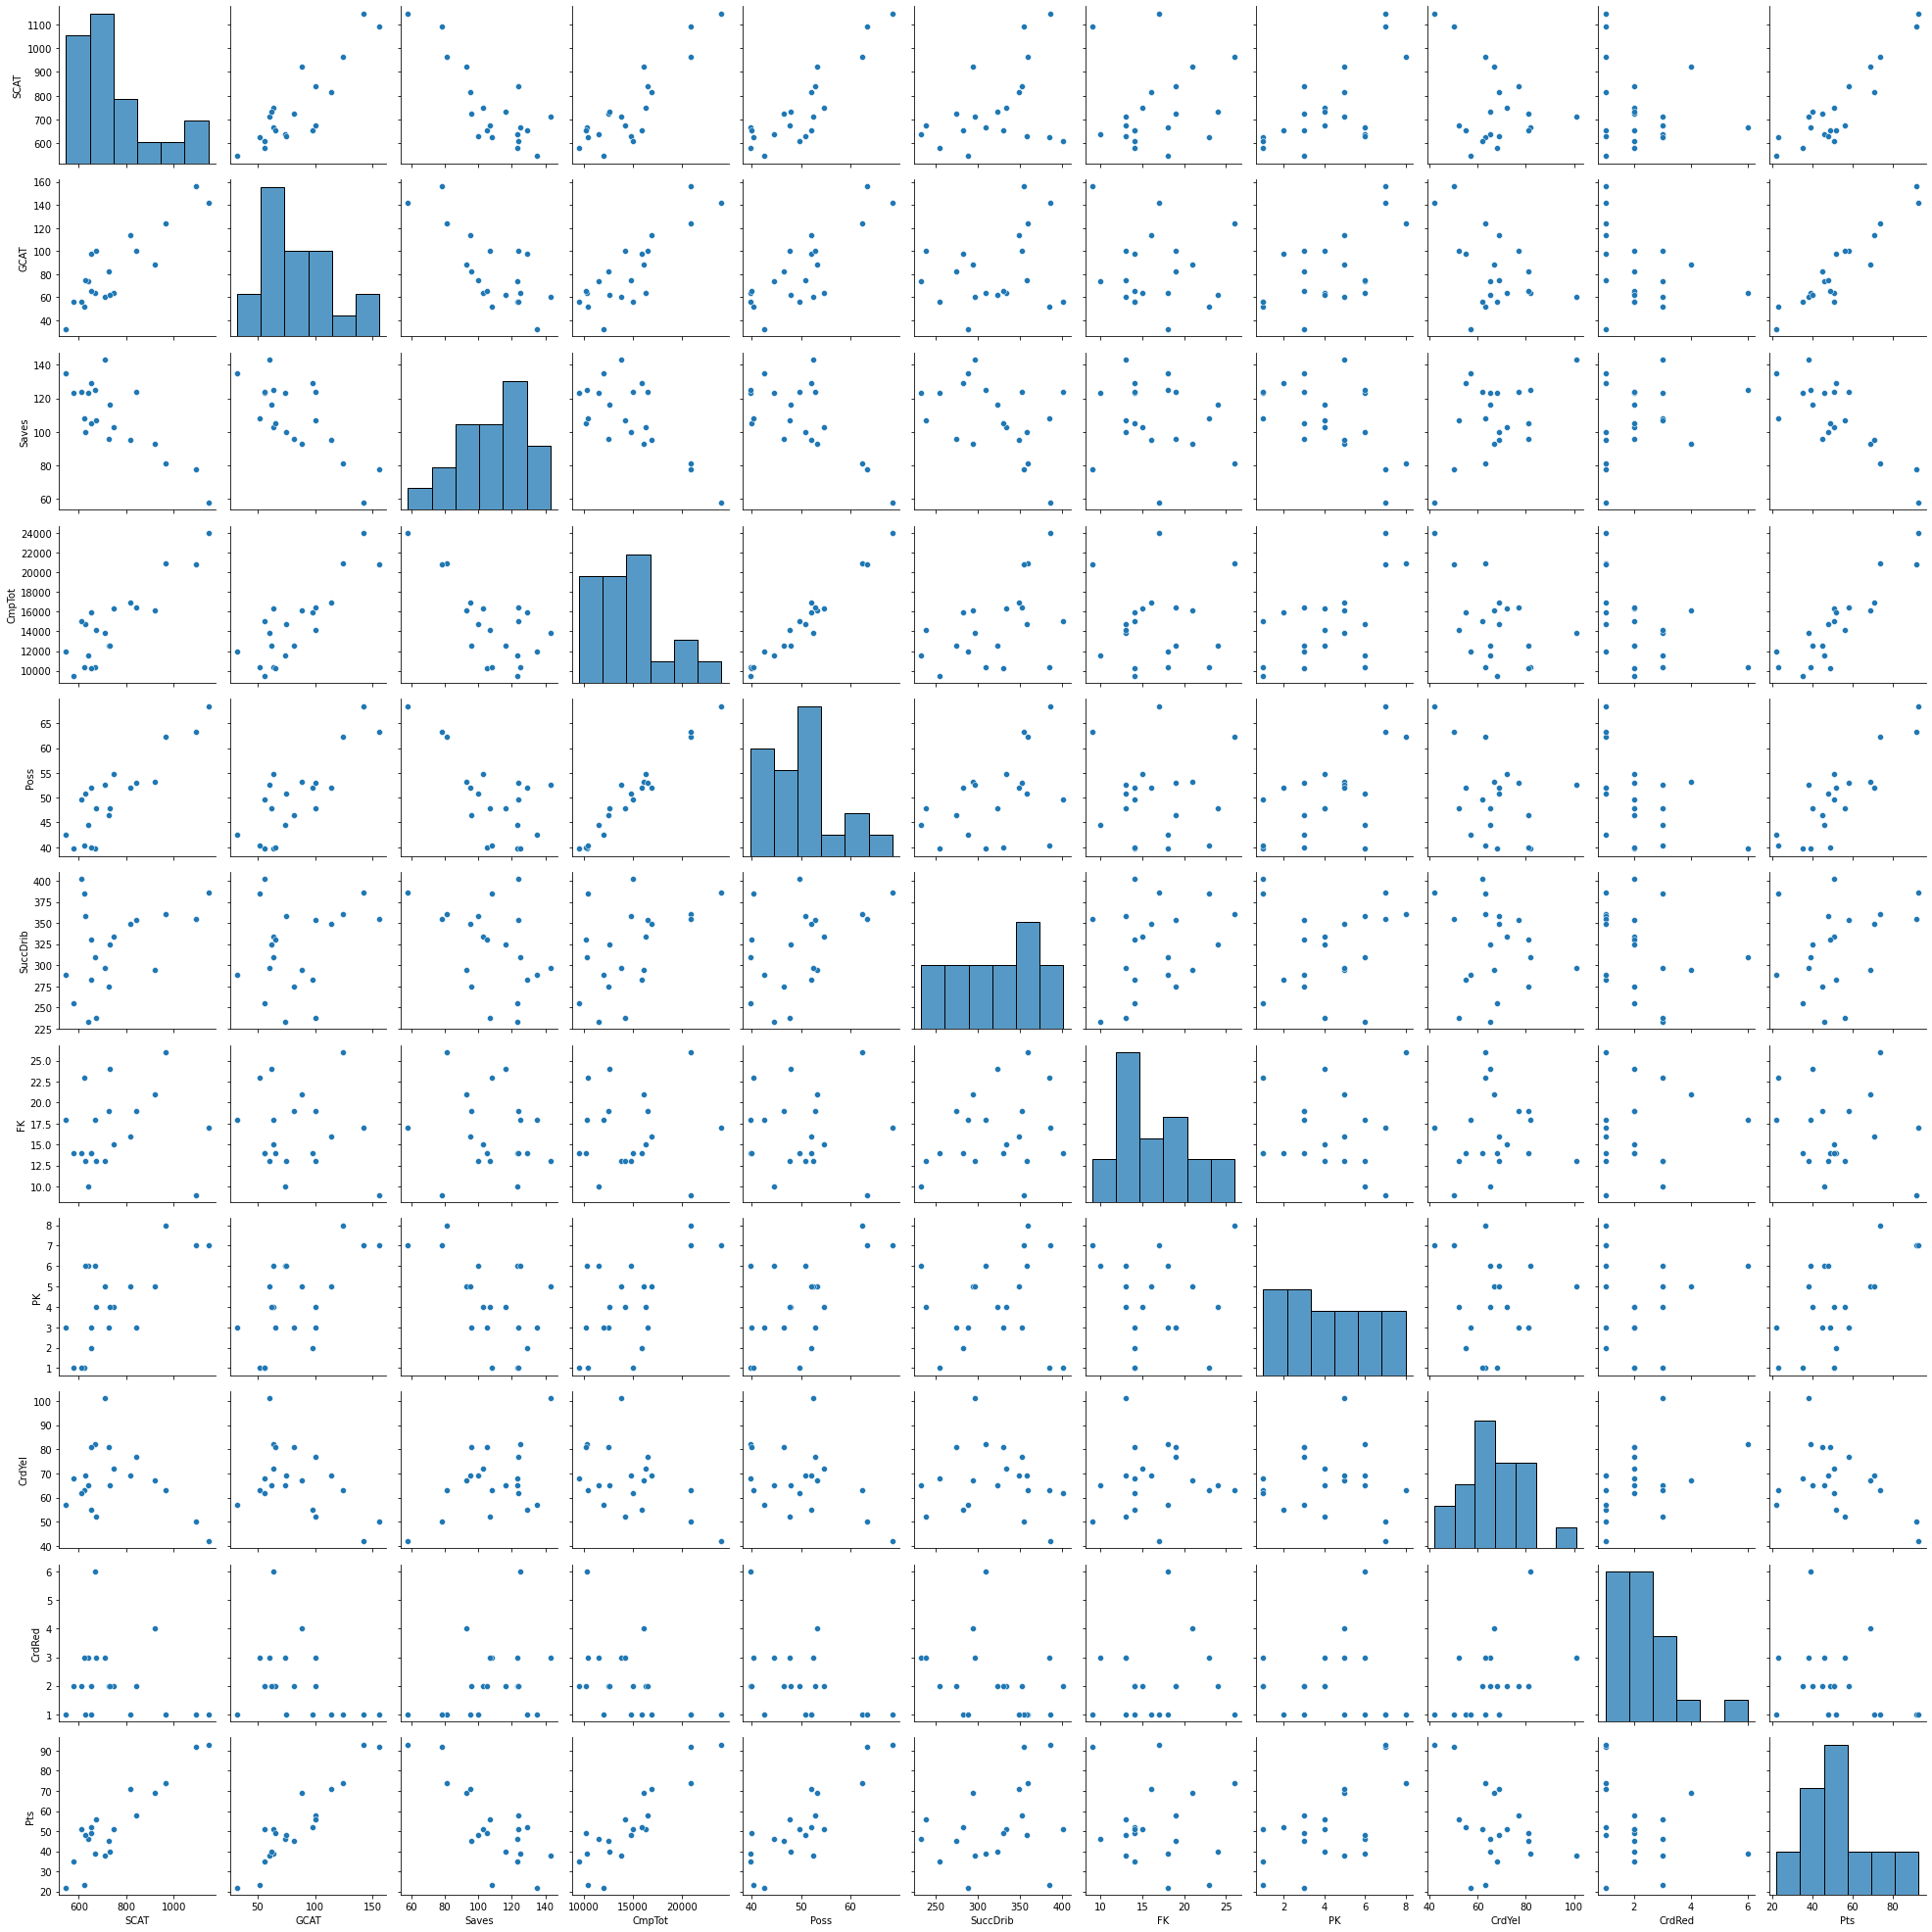

In [7]:
sns.pairplot(df[['SCAT','GCAT','Saves','CmpTot','Poss','SuccDrib','FK','PK','CrdYel','CrdRed','Pts']])
plt.tight_layout()
plt.show()

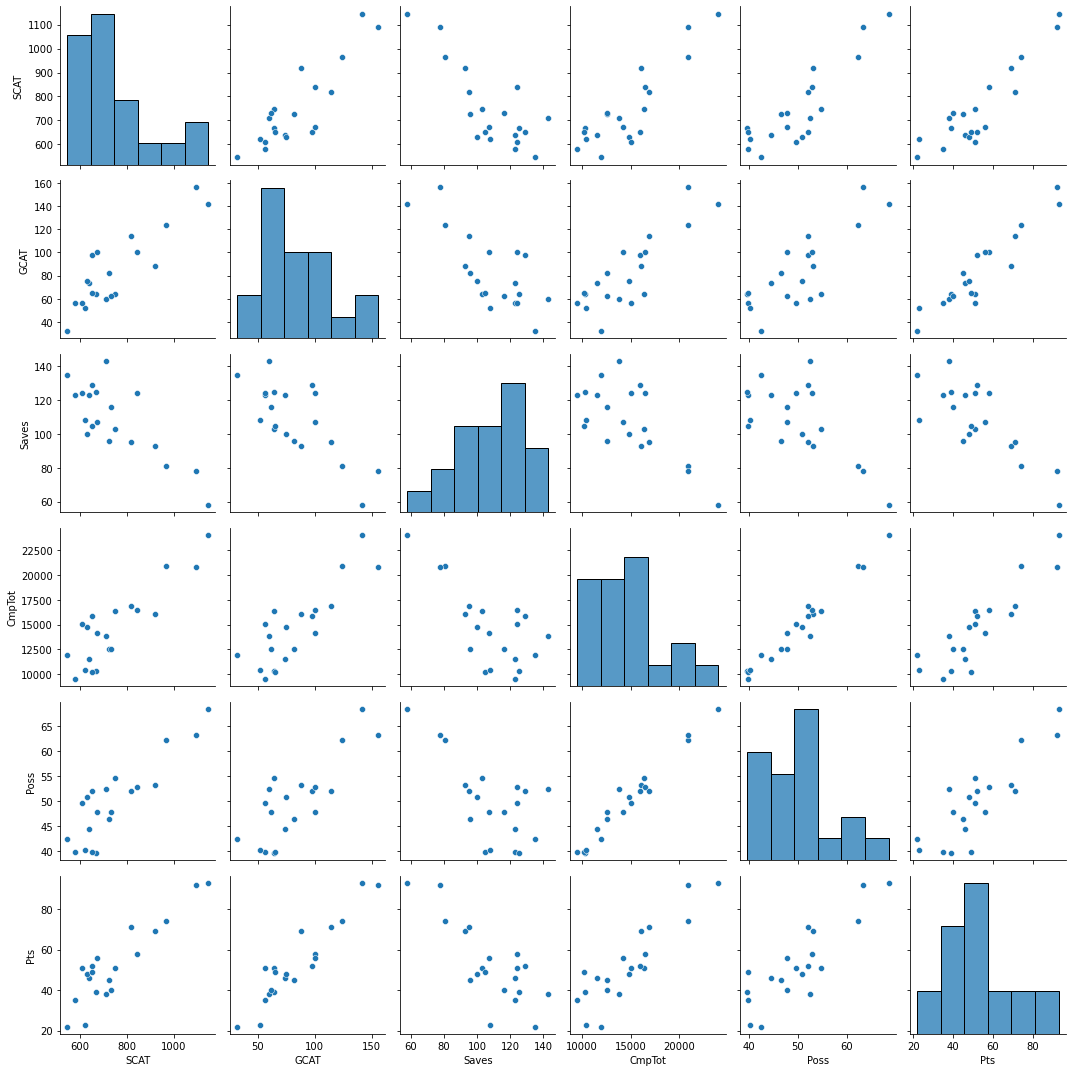

In [8]:
sns.pairplot(df[['SCAT','GCAT','Saves','CmpTot','Poss','Pts']])
plt.tight_layout()
plt.show()

In [9]:
y = df['Pts'].values
# GCAT:ゴールにつながる動き、Saves:セーブ数、CmpTot:パス成功率,Poss:ポゼッション　あたりが良さそう。
x = df[['GCAT','Saves','CmpTot','Poss']].values
x

array([[   88. ,    93. , 16110. ,    53.2],
       [   82. ,    96. , 12521. ,    46.5],
       [   74. ,   123. , 11551. ,    44.5],
       [   64. ,   103. , 16342. ,    54.7],
       [   56. ,   123. ,  9508. ,    39.8],
       [  124. ,    81. , 20878. ,    62.3],
       [   75. ,   100. , 14780. ,    50.9],
       [   64. ,   125. , 10325. ,    39.7],
       [   60. ,   143. , 13830. ,    52.5],
       [   98. ,   129. , 15911. ,    52.1],
       [  156. ,    78. , 20856. ,    63.3],
       [  142. ,    58. , 24032. ,    68.5],
       [  100. ,   124. , 16464. ,    52.9],
       [   65. ,   105. , 10211. ,    39.9],
       [   32. ,   135. , 11974. ,    42.5],
       [   62. ,   116. , 12571. ,    47.9],
       [  114. ,    95. , 16914. ,    52. ],
       [   52. ,   108. , 10380. ,    40.3],
       [  100. ,   107. , 14176. ,    47.8],
       [   56. ,   124. , 15024. ,    49.6]])

In [10]:
from sklearn.linear_model import LinearRegression
# 線形回帰モデルの使用→結果をとにかく出力する事
model = LinearRegression()
result = model.fit(x,y)


In [11]:
print('coefficient = ', model.coef_[0]) # 説明変数の係数を出力　決定係数の出力
print('intercept = ',model.intercept_) # 切片を出力

coefficient =  0.3376919561119297
intercept =  17.950003091647453
